# SQLite Analysis of MTA Turnstile Data 🚇

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### Load Cleaned CSV into SQLite Database

In [2]:
df = pd.read_csv('../data/processed/cleaned_Turnstile2022.csv')
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
conn = sqlite3.connect('../data/processed/turnstile.db')
df.to_sql('turnstile_data', conn, if_exists='replace', index=False)
print(' Data loaded into SQLite successfully.')

/var/folders/rk/gh7_0ltx2v71ltw25mck4xrm0000gn/T/ipykernel_29430/649418778.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/cleaned_Turnstile2022.csv')


✅ Data loaded into SQLite successfully.


### 🔝 Top 10 Busiest Devices

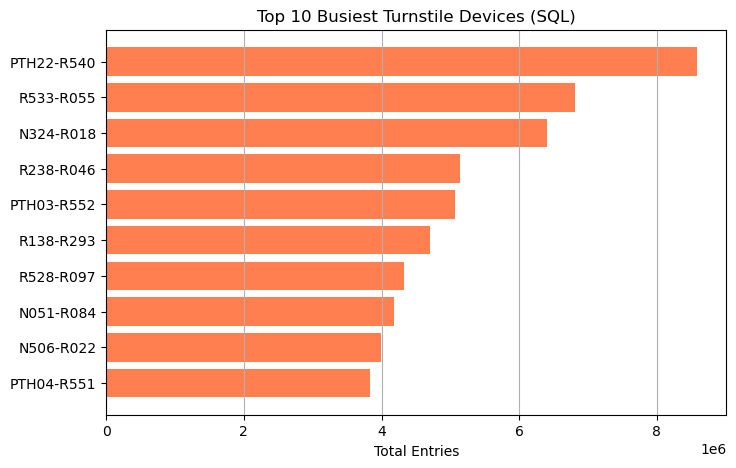

In [3]:
query = '''
SELECT [C/A] || '-' || [UNIT] AS device, SUM(HOURLY_ENTRIES) AS total_entries
FROM turnstile_data
GROUP BY device
ORDER BY total_entries DESC
LIMIT 10;
'''
top_devices_df = pd.read_sql_query(query, conn)
plt.figure(figsize=(8,5))
plt.barh(top_devices_df['device'], top_devices_df['total_entries'], color='coral')
plt.xlabel('Total Entries')
plt.title('Top 10 Busiest Turnstile Devices (SQL)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

### 🕒 Average Hourly Entries

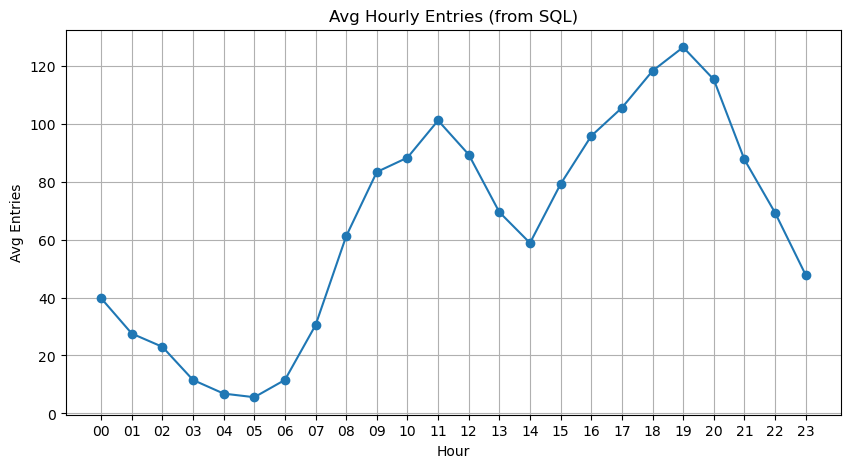

In [4]:
query = '''
SELECT strftime('%H', DATETIME) AS hour, AVG(HOURLY_ENTRIES) AS avg_entries
FROM turnstile_data
GROUP BY hour
ORDER BY hour;
'''
hourly_sql_df = pd.read_sql_query(query, conn)
plt.figure(figsize=(10,5))
plt.plot(hourly_sql_df['hour'], hourly_sql_df['avg_entries'], marker='o')
plt.title('Avg Hourly Entries (from SQL)')
plt.xlabel('Hour')
plt.ylabel('Avg Entries')
plt.grid(True)
plt.show()

### 🗓️ Average Entries by Day of Week

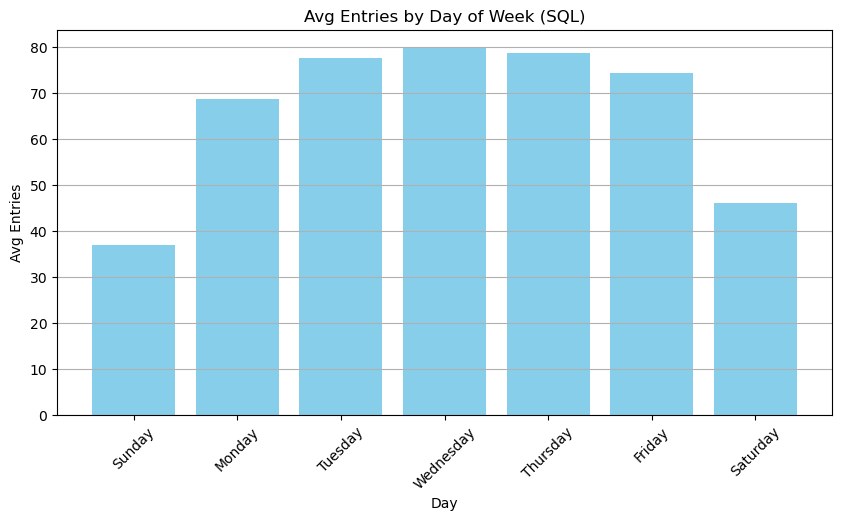

In [5]:
query = '''
SELECT strftime('%w', DATETIME) AS weekday, AVG(HOURLY_ENTRIES) AS avg_entries
FROM turnstile_data
GROUP BY weekday
ORDER BY weekday;
'''
dow_df = pd.read_sql_query(query, conn)
dow_df['weekday'] = dow_df['weekday'].map({
    '0': 'Sunday', '1': 'Monday', '2': 'Tuesday',
    '3': 'Wednesday', '4': 'Thursday',
    '5': 'Friday', '6': 'Saturday'
})
plt.figure(figsize=(10,5))
plt.bar(dow_df['weekday'], dow_df['avg_entries'], color='skyblue')
plt.title('Avg Entries by Day of Week (SQL)')
plt.xlabel('Day')
plt.ylabel('Avg Entries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [6]:
conn.close()